In [1]:
import pandas as pd
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
df.Gender = le.fit_transform(df[['Gender']])

In [5]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [6]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   int32  
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), int32(1)
memory usage: 167.2 KB


In [8]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
df.shape

(8555, 3)

In [10]:
df.corr()

,Gender,Height,Weight
Gender,1.000000,0.682524,0.790208
Height,0.682524,1.000000,0.922975
Weight,0.790208,0.922975,1.000000


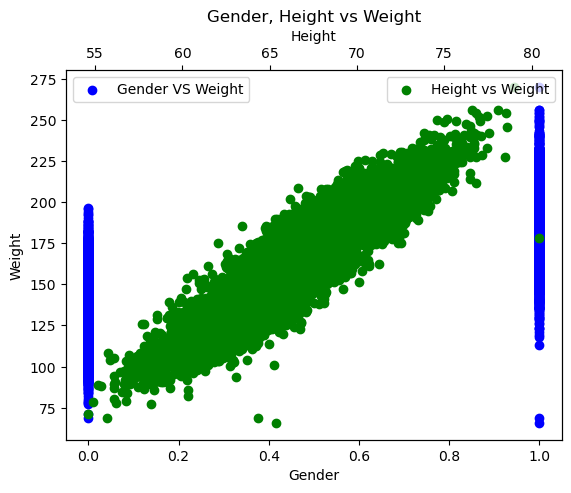

In [11]:
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots()
ax1.scatter(df[['Gender']], df[['Weight']], color='blue', label='Gender VS Weight')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Weight')
ax1.legend(loc='upper left')

ax2 = ax1.twiny()
ax2.scatter(df[['Height']], df[['Weight']], color='green', label='Height vs Weight')
ax2.set_xlabel('Height')
ax2.legend(loc='upper right')
plt.title("Gender, Height vs Weight")
plt.show()

In [12]:
import seaborn as sns

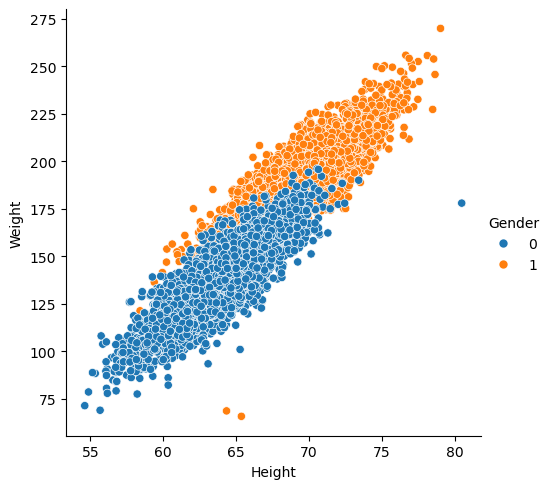

In [13]:
sns.relplot(x=df.Height,y=df.Weight,data=df,hue='Gender')

In [14]:
df[['Gender','Height']].head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [15]:
df[['Gender','Height']].tail()

,Gender,Height
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971
8554,0,60.921791


In [16]:
df[['Weight']].head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [17]:
df[['Weight']].tail()

,Weight
8550,110.565497
8551,129.921671
8552,155.942671
8553,151.678405
8554,131.253738


In [18]:
x=df.drop('Weight',axis=1)

In [19]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [20]:
y=df.drop(['Gender','Height'],axis=1)

In [21]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.30,random_state=0)

In [24]:
xtrain.shape

(5988, 2)

In [25]:
xtrain.head()

,Gender,Height
3197,1,69.689848
4394,1,66.299441
7711,0,63.261527
7019,0,62.035319
898,1,67.272171


In [26]:
xtrain.shape

(5988, 2)

In [27]:
ytrain.head()

,Weight
3197,186.377448
4394,159.235988
7711,126.426793
7019,119.418135
898,187.363366


In [28]:
ytrain.shape

(5988, 1)

In [29]:
xtest.head()

,Gender,Height
541,1,63.867921
3209,1,68.688931
7598,0,65.865244
5170,0,66.259558
2423,1,67.290776


In [30]:
xtest.shape

(2567, 2)

In [31]:
ytest.head()

,Weight
541,174.473363
3209,178.507500
7598,155.248900
5170,138.839940
2423,154.718344


In [32]:
ytest.shape

(2567, 1)

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg=LinearRegression()

In [35]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [36]:
reg.coef_ #Slope - m

array([[19.67647385,  5.95976283]])

In [37]:
reg.intercept_ #y-intercept-C

array([-244.11178083])

In [38]:
reg_y_pred=reg.predict(xtest)

In [39]:
reg_y_pred

array([[156.20235428],
       [184.93442898],
       [148.42945323],
       ...,
       [159.2442037 ],
       [166.96403181],
       [136.95529212]])

## Train Accuracy

In [40]:
reg.score(xtrain,ytrain)

0.8988118427483529

## Test Accuracy

In [41]:
reg.score(xtest,ytest)

0.9025307579174771

## MSE

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
reg_MSE=mean_squared_error(ytest,reg_y_pred)

In [44]:
reg_MSE

102.30154155088874

# KNN for Regression

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
knn_r = KNeighborsRegressor()

In [47]:
knn_r.fit(xtrain,ytrain)

KNeighborsRegressor()

In [48]:
knn_y_pred=knn_r.predict(xtest)

In [49]:
knn_y_pred

array([[156.87869808],
       [190.41706558],
       [156.50942888],
       ...,
       [159.33057636],
       [177.60626318],
       [136.57106608]])

## KNN Regression Train Accuracy

In [50]:
knn_r.score(xtrain,ytrain)

0.9184951353192796

## KNN Regression Test Accuracy

In [51]:
knn_r.score(xtest,ytest)

0.8805893134749361

## MSE

In [52]:
knn_r_MSE=mean_squared_error(ytest,knn_y_pred)

In [53]:
knn_r_MSE

125.33079203407898

## Compare KNN & Linear Regression with the KNN Model and Linear regression

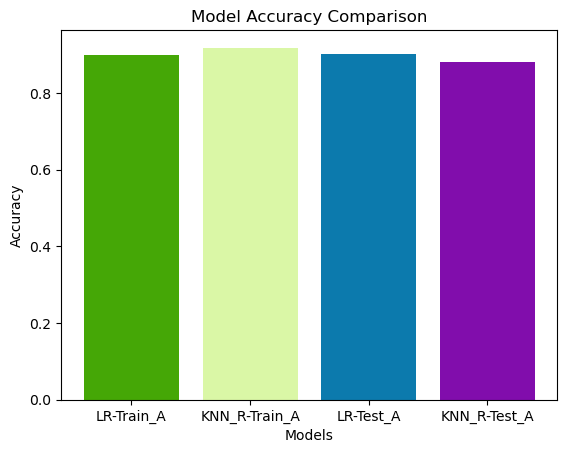

In [54]:
model_names = ['LR-Train_A', 'KNN_R-Train_A','LR-Test_A', 'KNN_R-Test_A']
accuracy_values = [reg.score(xtrain,ytrain), knn_r.score(xtrain,ytrain),reg.score(xtest,ytest), knn_r.score(xtest,ytest)]  
plt.bar(model_names, accuracy_values, color=['#45a706','#DAF7A6','#0c7aad', '#810dac'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


# KNN for Classification

In [55]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [56]:
c_x=df.drop('Gender',axis=1)

In [57]:
c_x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [58]:
c_x.shape

(8555, 2)

In [59]:
c_y=df.drop(['Height','Weight'],axis=1)

In [60]:
c_y.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [61]:
c_y.shape

(8555, 1)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
c_xtrain, c_xtest, c_ytrain, c_ytest = train_test_split(c_x, c_y,test_size=0.30,random_state=0)

In [64]:
c_xtrain.head()

,Height,Weight
3197,69.689848,186.377448
4394,66.299441,159.235988
7711,63.261527,126.426793
7019,62.035319,119.418135
898,67.272171,187.363366


In [65]:
c_xtrain.shape

(5988, 2)

In [66]:
c_ytrain.head()

,Gender
3197,1
4394,1
7711,0
7019,0
898,1


In [67]:
c_ytrain.shape

(5988, 1)

In [68]:
c_xtest.head()

,Height,Weight
541,63.867921,174.473363
3209,68.688931,178.507500
7598,65.865244,155.248900
5170,66.259558,138.839940
2423,67.290776,154.718344


In [69]:
c_xtest.shape

(2567, 2)

In [70]:
c_ytest.head()

,Gender
541,1
3209,1
7598,0
5170,0
2423,1


In [71]:
c_ytest.shape

(2567, 1)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn_c=KNeighborsClassifier()

In [74]:
knn_c.fit(c_xtrain,c_ytrain)

KNeighborsClassifier()

In [75]:
knn_c_y_predict=knn_c.predict(c_xtest)

In [76]:
knn_c_y_predict

array([1, 1, 0, ..., 1, 1, 0])

In [77]:
knn_c.score(c_xtrain,c_ytrain)

0.9318637274549099

In [78]:
knn_c.score(c_xtest,c_ytest)

0.9068952084144917